# Importing useful libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download historical data from Yahoo Finance

In [3]:
ticker = "NFLX"
data = yf.download(ticker, start="2018-01-01", end="2023-01-01", interval="1d")

[*********************100%%**********************]  1 of 1 completed


# Define Donchian Channel parameters

In [4]:
donchian_period = 10
stop_loss_percent = 1  # Set your desired stop loss percentage
resistance_percent = 2  # Set your desired resistance level percentage

# Develop a trading strategy using Donchian Channel

In [5]:
def calculate_donchian_channel(data, period=20):
    data['UpperBand'] = data['Close'].rolling(window=period).max()
    data['LowerBand'] = data['Open'].rolling(window=period).min()

calculate_donchian_channel(data)

In [6]:
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand
Date,,,,,,,,
2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900,NaN,NaN
2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400,NaN,NaN
2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600,NaN,NaN
2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200,NaN,NaN
2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,320.410004,281.23999
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,320.410004,281.23999
2022-12-28,281.920013,285.190002,273.410004,276.880005,276.880005,5964400,320.410004,281.23999


# Eliminitating Nan Columns

In [7]:
data=data.iloc[21:,0:]

# Create a chart for the closing price versus date

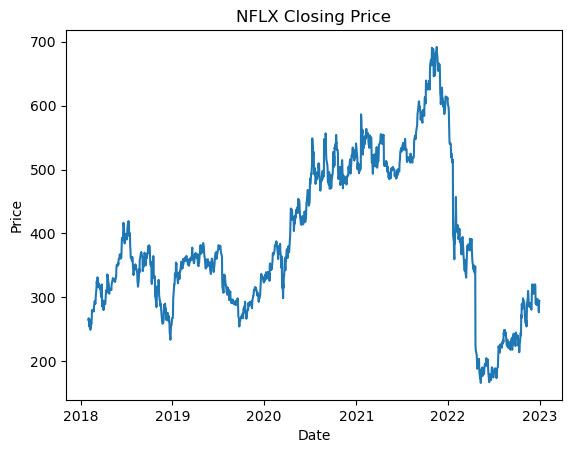

In [8]:
plt.plot(data.index,data['Close'])
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Initialising Signal and Portfolio Column

In [9]:
data['Signal'] = 0  # 0 for hold, 1 for buy, -1 for sell

data['Portfolio']=0
data['Portfolio'][0]=10000

C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\840194682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio'][0]=10000


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,Signal,Portfolio
Date,,,,,,,,,,
2018-02-01,266.410004,271.950012,263.380005,265.070007,265.070007,9669000,284.589996,206.199997,0,10000
2018-02-02,263.000000,270.619995,262.709991,267.429993,267.429993,9123600,284.589996,207.250000,0,0
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,284.589996,207.570007,0,0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,284.589996,207.570007,0,0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,284.589996,207.570007,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,320.410004,281.239990,0,0
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,320.410004,281.239990,0,0
2022-12-28,281.920013,285.190002,273.410004,276.880005,276.880005,5964400,320.410004,281.239990,0,0


# Generating buy and sell signals using Donchian Channel, Stop Loss and Resistance

In [11]:
len_data = data.shape[0]
last_action = 0
i = 0
data['Signal'] = 0  # 0 for hold, 1 for buy, -1 for sell


while i < (len_data - 2):
    if data['UpperBand'][i + 1] > data['UpperBand'][i]:
        data['Signal'][i + 1] = 1
        last_action = 1
        price = data['Close'][i + 1]
        StopLoss = price * (1 - stop_loss_percent / 100)
        Resistance = price * (1 + resistance_percent / 100)
        h = i

        for j in range(h + 2, len_data - 2):
            #print(i, j)
            i += 1

            if data['LowerBand'][j + 1] < data['LowerBand'][j] and last_action == 1:
                data['Signal'][j + 1] = -1
                last_action = -1
                i += 1
                break
                
            elif data['Close'][j + 1] < StopLoss and last_action == 1:
                data['Signal'][j + 1] = -1
                last_action = -1
                i += 1
                break
                
            elif data['Close'][j + 1] > Resistance and last_action == 1:
                data['Signal'][j + 1] = -1
                last_action = -1
                i += 1
                break

    i += 1


C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\3322337066.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][i + 1] = 1
C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\3322337066.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][j + 1] = -1
C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\3322337066.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][j + 1] = -1


In [12]:
data.head(50)

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,Signal,Portfolio
Date,,,,,,,,,,
2018-02-01,266.410004,271.950012,263.380005,265.070007,265.070007,9669000,284.589996,206.199997,0,10000
2018-02-02,263.000000,270.619995,262.709991,267.429993,267.429993,9123600,284.589996,207.250000,0,0
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,284.589996,207.570007,0,0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,284.589996,207.570007,0,0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,284.589996,207.570007,0,0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,284.589996,214.289993,0,0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,284.589996,217.179993,0,0
2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,284.589996,220.339996,0,0
2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,284.589996,220.339996,0,0


# Calculating PortFolio Values

In [13]:
ind=-1
no_of_shares = 0  
for i in range(0, len_data - 2):
    if data['Signal'][i]==1 :
        no_of_shares=data['Portfolio'][i]/data['Close'][i]
        data['Portfolio'][i+1]=(data['Close'][i+1]-data['Close'][i])*no_of_shares + data['Portfolio'][i]
        ind=0
    
    if data['Signal'][i]==0 and ind==0:
        data['Portfolio'][i+1]=(data['Close'][i+1]-data['Close'][i])*no_of_shares + data['Portfolio'][i]
    
    if data['Signal'][i]==-1:
        data['Portfolio'][i+1]=data['Portfolio'][i]
        ind=-1
        
    if data['Signal'][i]==0 and ind==-1:
        data['Portfolio'][i+1]=data['Portfolio'][i]

C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\1251011810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio'][i+1]=data['Portfolio'][i]
C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\1251011810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio'][i+1]=(data['Close'][i+1]-data['Close'][i])*no_of_shares + data['Portfolio'][i]


In [14]:
data.head(100)

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,Signal,Portfolio
Date,,,,,,,,,,
2018-02-01,266.410004,271.950012,263.380005,265.070007,265.070007,9669000,284.589996,206.199997,0,10000.000000
2018-02-02,263.000000,270.619995,262.709991,267.429993,267.429993,9123600,284.589996,207.250000,0,10000.000000
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,284.589996,207.570007,0,10000.000000
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,284.589996,207.570007,0,10000.000000
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,284.589996,207.570007,0,10000.000000
...,...,...,...,...,...,...,...,...,...,...
2018-06-19,389.500000,405.290009,388.500000,404.980011,404.980011,16697100,404.980011,329.040009,-1,12520.716105
2018-06-20,415.149994,419.470001,409.600006,416.760010,416.760010,16494600,416.760010,329.040009,1,12520.716105
2018-06-21,421.380005,423.209991,406.369995,415.440002,415.440002,18389900,416.760010,344.339996,0,12481.059140


# Generating Plot of Signals With Time

Text(0, 0.5, 'Signal')

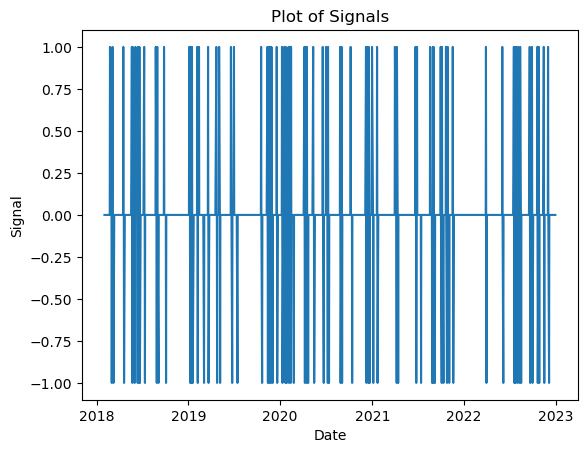

In [15]:
plt.plot(data.index,data['Signal'])
plt.title('Plot of Signals')
plt.xlabel('Date')
plt.ylabel('Signal')

# Calculating Daily Returns

In [16]:
data['DailyReturns'] = data['Portfolio'].pct_change()

In [17]:
data.iloc[:-1, :]

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,Signal,Portfolio,DailyReturns
Date,,,,,,,,,,,
2018-02-01,266.410004,271.950012,263.380005,265.070007,265.070007,9669000,284.589996,206.199997,0,10000.000000,NaN
2018-02-02,263.000000,270.619995,262.709991,267.429993,267.429993,9123600,284.589996,207.250000,0,10000.000000,0.0
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,284.589996,207.570007,0,10000.000000,0.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,284.589996,207.570007,0,10000.000000,0.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,284.589996,207.570007,0,10000.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,298.089996,298.880005,290.809998,297.750000,297.750000,7856200,320.410004,281.239990,0,12232.032075,0.0
2022-12-23,296.179993,298.459991,291.910004,294.959991,294.959991,4251100,320.410004,281.239990,0,12232.032075,0.0
2022-12-27,293.190002,293.570007,282.130005,284.170013,284.170013,5778100,320.410004,281.239990,0,12232.032075,0.0


# Creating Position to keep Track of current position (Open-1 and Close-0)

In [31]:
data['Position']=0
start=0
for i in range(0,data.shape[0]):
    if data['Signal'][i]==1:
        data['Position'][i]=1
        start=1
    elif start==1:
        data['Position'][i]=1
    
    if data['Signal'][i]==-1:
        data['Position'][i]=1
        start=0

C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\220168767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position']=0
C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\220168767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'][i]=1
C:\Users\sachi\AppData\Local\Temp\ipykernel_28600\220168767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[

# Storing Data to Excel File

In [38]:
data = data.iloc[:-1, :]
excel=data[['Signal','Position','Portfolio']]
excel.to_excel('summary.xlsx', index=True, sheet_name='Sheet1')

# Calculating Maximum Drawdown

In [20]:
max_drawdown = 0
peak_portfolio_value = data['Portfolio'].iloc[0]

for i in range(1, len_data-2):
    current_value = data['Portfolio'].iloc[i]

    if current_value > peak_portfolio_value:
        peak_portfolio_value = current_value
    else:
        drawdown = (current_value - peak_portfolio_value) / peak_portfolio_value * 100
        max_drawdown = min(max_drawdown, drawdown)

print("Maximum Drawdown (%):", max_drawdown)

Maximum Drawdown (%): -26.92157807162175


# Calculating Sharpe Ratio

In [21]:
risk_free_rate = 0.07358 # current 10 year bond rate
mean_return = data["DailyReturns"].mean()
std_deviation = data["DailyReturns"].std()

sharpe_ratio = (mean_return - risk_free_rate) / std_deviation

print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -7.959330231008133


# Calculate summary statistics

In [22]:
initial_index=data['Adj Close'].iloc[0]
final_index=data['Adj Close'].iloc[-1]

summary = {
    'Strategy Return': (data['Portfolio'][-1] - data['Portfolio'][0]) / data['Portfolio'][0],
    'Annualized Return': (1 + data['DailyReturns'].mean()) ** 252 - 1,
    'Benchmark Return' : ((final_index-initial_index)/initial_index)*100,
    'Number of Trades': data['Signal'].abs().sum(),
    'Max Drawdown': max_drawdown,
    'Sharpe Ratio':sharpe_ratio,
    'Win Ratio': (data['DailyReturns'] > 0).mean(),
    'Loss-Making Trades': (data['DailyReturns'] < 0).sum(),
    'Largest Loss-Making Trade': data['DailyReturns'].min(),
    'Largest Profit-Making Trade': data['DailyReturns'].max(),
    'Daily Returns': data['DailyReturns'].mean(),
}

# Save summary to a CSV file

In [23]:
summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

# Display summary

In [24]:
print(summary_df)

                                  Value
Strategy Return                0.223203
Annualized Return              0.053017
Benchmark Return               9.827588
Number of Trades             148.000000
Max Drawdown                 -26.921578
Sharpe Ratio                  -7.959330
Win Ratio                      0.087308
Loss-Making Trades           119.000000
Largest Loss-Making Trade     -0.061531
Largest Profit-Making Trade    0.080688
Daily Returns                  0.000205


# Ploting Buy and Sell Signals with Stop Loss and Resistance

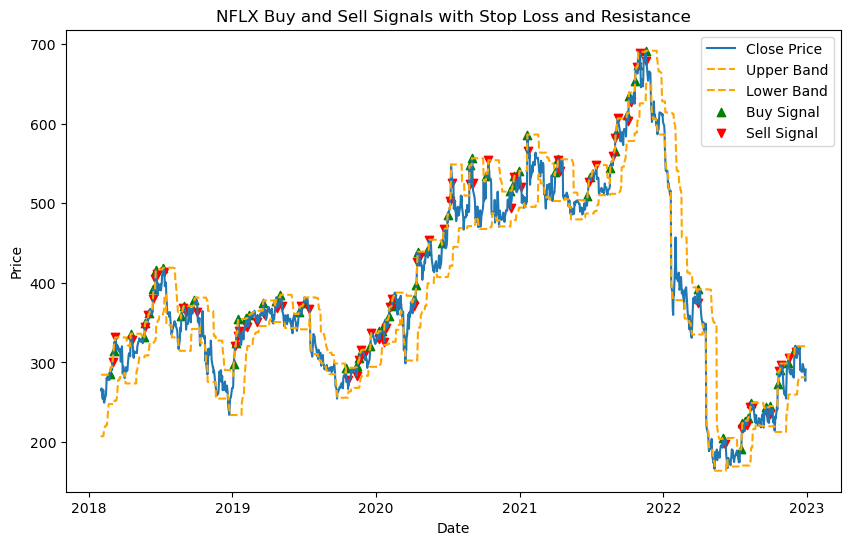

In [25]:
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['UpperBand'], label='Upper Band', linestyle='--', color='orange')
plt.plot(data['LowerBand'], label='Lower Band', linestyle='--', color='orange')
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

plt.title(f'{ticker} Buy and Sell Signals with Stop Loss and Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

# Ploting Daily Returns over Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


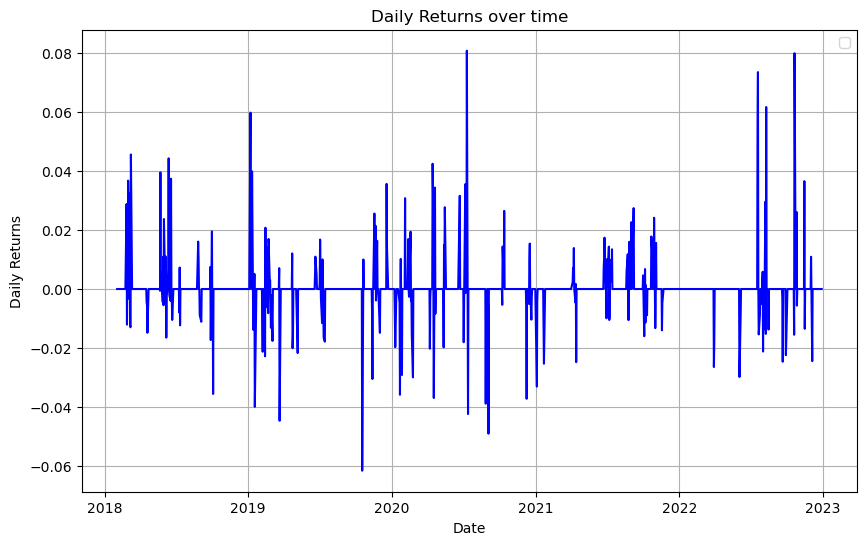

In [26]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['DailyReturns'], c='b')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns over time')
plt.legend()
plt.grid(True)
plt.savefig('plot_of_Daily_returns.png')
plt.show()

# Ploting PortFolio Value over time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


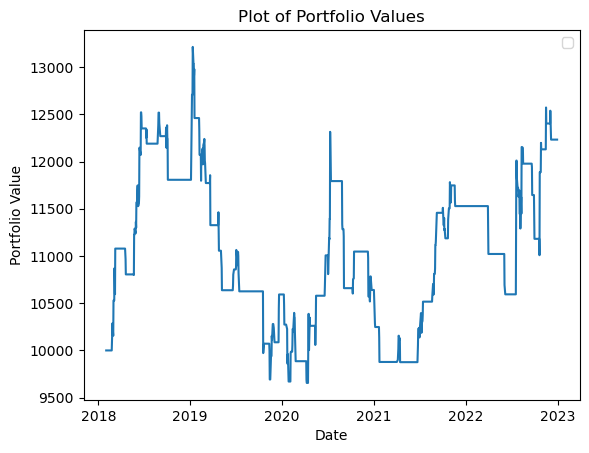

In [27]:
plt.figure()
plt.plot(data['Portfolio'])
plt.title('Plot of Portfolio Values')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.savefig('plot_of_portfolio.png')